In [1]:
import numpy as np
import matplotlib.pyplot as pp

# Functions

In [2]:
# Objective function: f(x) + lambda*norm1(x)
def obj(A,x,b,lamda):
    assert(np.size(x,0)==np.size(A,1) and np.size(A,0) == np.size(b,0) and \
    np.size(x,1)== np.size(b,1) == 1 and np.isscalar(lamda))
    return f(A,x,b) + lamda*np.sum(np.abs(x))

In [3]:
# f(x) = (1/2)||Ax-b||^2
def f(A,x,b):
    assert(np.size(x,0)==np.size(A,1) and np.size(A,0) == np.size(b,0) and \
    np.size(x,1)== np.size(b,1) == 1)
    Ax_b = A.dot(x) - b
    return 0.5*(Ax_b.T.dot(Ax_b))

In [4]:
# gradient of f(x)= A'(Ax - b)   
def grf(A,x,b):
    assert(np.size(x,0)==np.size(A,1) and np.size(A,0) == np.size(b,0) and \
    np.size(x,1)== np.size(b,1) == 1)
    return A.T.dot(A.dot(x) - b)

In [5]:
# Model function evaluated at x and touches f(x) in xk
def m(x,xk,A,b,GammaK):
    assert(np.size(xk,0) == np.size(x,0) == np.size(A,1) \
    and np.size(A,0) == np.size(b,0) and \
    np.size(xk,1) == np.size(x,1) == np.size(b,1) == 1 and np.isscalar(GammaK))
    innerProd = grf(A,xk,b).T.dot(x - xk)
    xDiff = x - xk
    return f(A,xk,b) + innerProd + (1.0/(2.0*GammaK))*xDiff.T.dot(xDiff)

In [6]:
# Shrinkage or Proximal operation
def proxNorm1(y,lamda):
    assert(np.size(y,1)==1)
    return np.sign(y)*np.maximum(np.zeros(np.shape(y)),np.abs(y)-lamda)

# 2 parameters

In [11]:
# Define parameters. Size of A is n x p
p = 1000
n = 500
kMax = 500   # Number of iteration
beta = 0.75 # decreasing factor for line search
# Generate the sparse vector xStar
# and Randomly set 20 elements
xStar = np.zeros((p,1))
xStar[np.floor(p*np.random.rand(20,1)).astype(np.int)]=1
xStar = xStar*np.random.normal(0,10,(p,1))

# Generate A and b. b = Ax + error
A = np.random.randn(n,p)
b = A.dot(xStar) + np.random.randn(n,1)
# This lamda is too large and making the x vector zero every time
lamda = np.sqrt(2*n*np.log(p)).tolist()
#lamda = 1.

# Proximal Gradient Descent
xk = np.random.rand(p,1) # Initialize with random
#xk = np.zeros((p,1))      # Initialize with zero

In [19]:
xStar = np.zeros((p,1))
xStar[np.floor(p*np.random.rand(20,1)).astype(np.int)]=1
xStar = xStar*np.random.normal(0,10,(p,1))

xStar

array([[  0.        ],
       [ -0.        ],
       [  0.        ],
       [ -0.        ],
       [ -0.        ],
       [  0.        ],
       [  0.        ],
       [ -0.        ],
       [  0.        ],
       [ -0.        ],
       [ -0.        ],
       [  0.        ],
       [  0.        ],
       [ -0.        ],
       [ -0.        ],
       [ -0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [ -0.        ],
       [  0.        ],
       [  0.        ],
       [  4.16709742],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [ -0.        ],
       [ -0.        ],
       [  0.        ],
       [ -0.        ],
       [  0.        ],
       [ -0.        ],
       [  9.671175  ],
       [  0.        ],
       [ -0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [ -0.        ],
       [ -0.        ],
       [  0.        ],
       [ -0

# 3 Proximal GD

k: 0  obj =  [[107778.08946312]] Change =  294113.89088634145


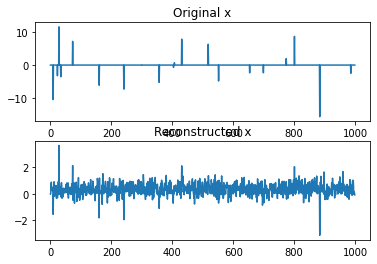

k: 1  obj =  [[54426.72516566]] Change =  53351.36429745905


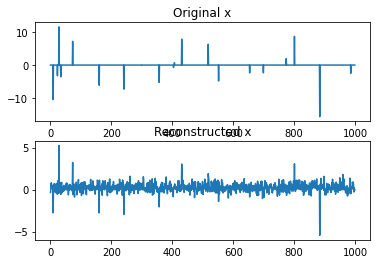

k: 2  obj =  [[42885.03712053]] Change =  11541.688045135103


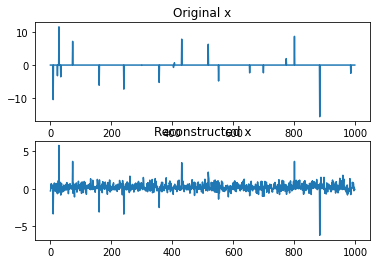

k: 3  obj =  [[37392.6815814]] Change =  5492.3555391236005


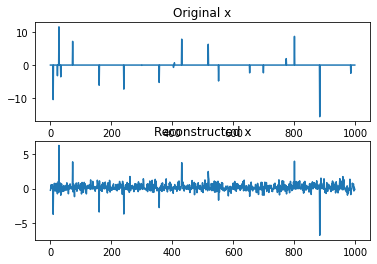

k: 4  obj =  [[34434.44898722]] Change =  2958.232594179324


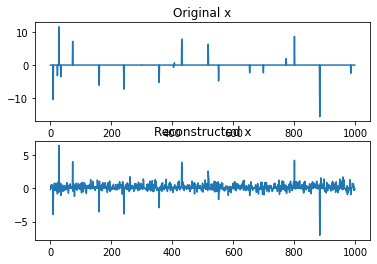

k: 5  obj =  [[30792.87366385]] Change =  3641.5753233705836


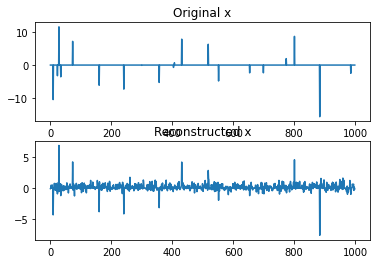

k: 6  obj =  [[28663.47541968]] Change =  2129.398244168893


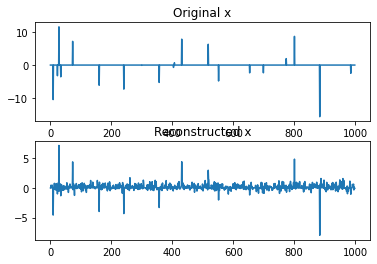

k: 7  obj =  [[26846.70278144]] Change =  1816.7726382462824


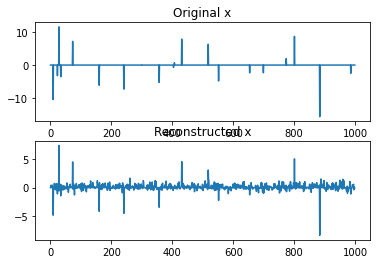

k: 8  obj =  [[25250.23099061]] Change =  1596.471790830281


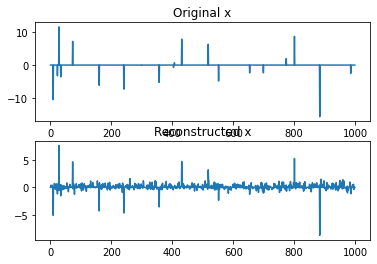

k: 9  obj =  [[23845.5513263]] Change =  1404.6796643108974


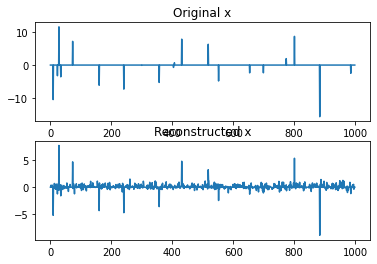

k: 10  obj =  [[22585.74218744]] Change =  1259.8091388540452


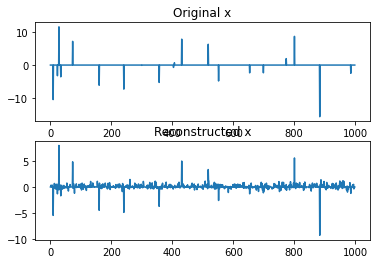

k: 11  obj =  [[21437.89568461]] Change =  1147.8465028348292


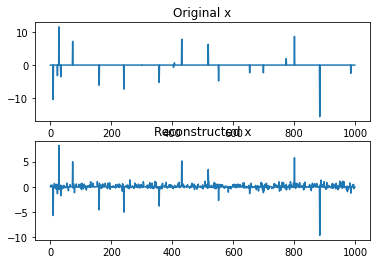

k: 12  obj =  [[20398.81144227]] Change =  1039.0842423426984


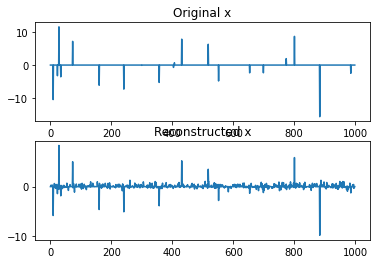

k: 13  obj =  [[19451.50998783]] Change =  947.301454437671


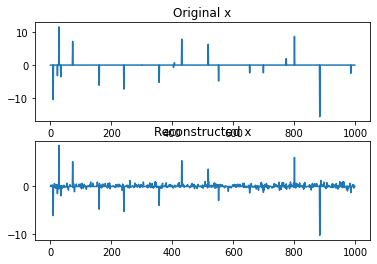

k: 14  obj =  [[18583.15102875]] Change =  868.3589590794691


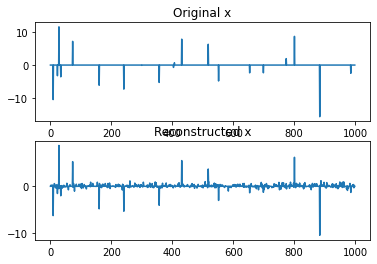

k: 15  obj =  [[17785.18319147]] Change =  797.9678372730923


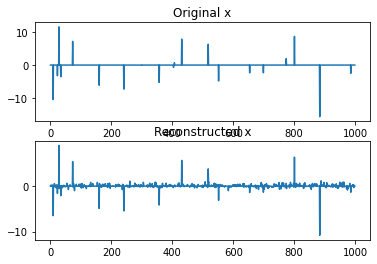

k: 16  obj =  [[17042.60614655]] Change =  742.577044927144


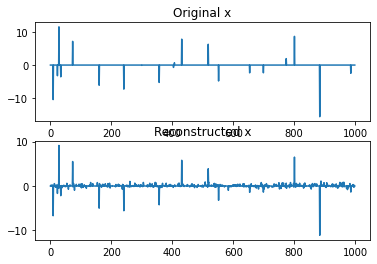

k: 17  obj =  [[16514.64079008]] Change =  527.9653564669788


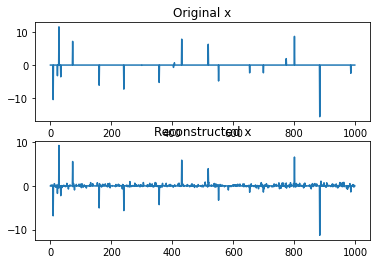

k: 18  obj =  [[16006.85507507]] Change =  507.78571500739235


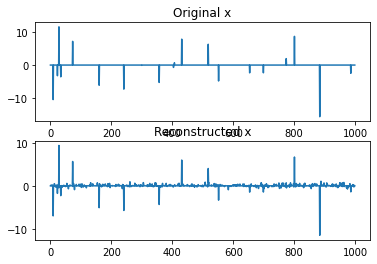

k: 19  obj =  [[15519.39027525]] Change =  487.46479982502024


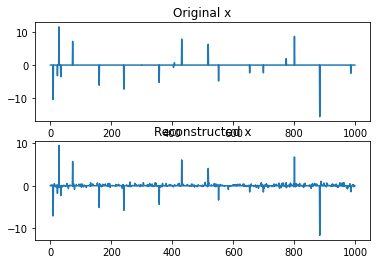

k: 20  obj =  [[15047.97014665]] Change =  471.4201285965428


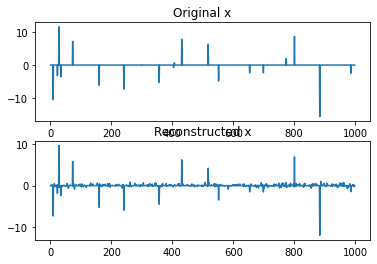

k: 21  obj =  [[14590.18569468]] Change =  457.7844519679293


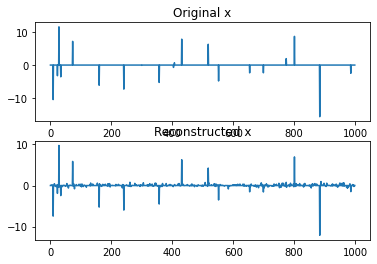

k: 22  obj =  [[14147.97143836]] Change =  442.2142563191428


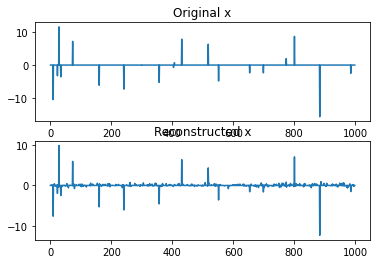

k: 23  obj =  [[13721.82936137]] Change =  426.1420769965989


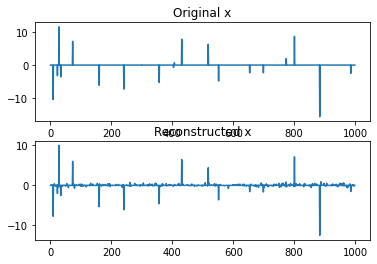

k: 24  obj =  [[13309.93915968]] Change =  411.8902016883512


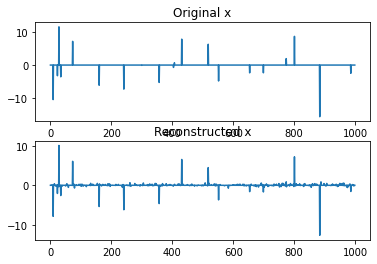

k: 25  obj =  [[12916.28090969]] Change =  393.6582499856595


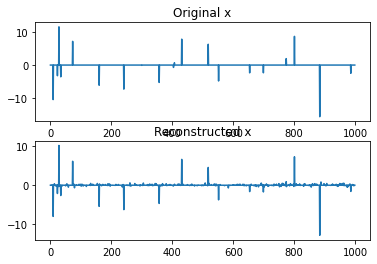

k: 26  obj =  [[12543.79050684]] Change =  372.49040285761293


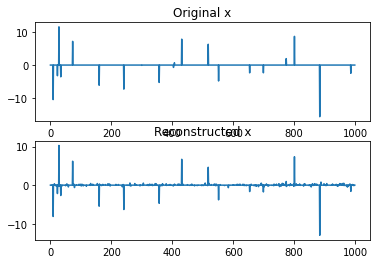

k: 27  obj =  [[12191.05448557]] Change =  352.7360212620679


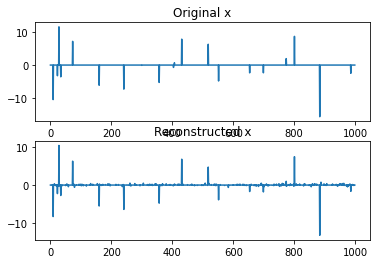

k: 28  obj =  [[11857.81876949]] Change =  333.2357160887914


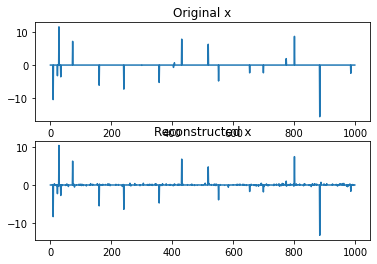

k: 29  obj =  [[11542.80721965]] Change =  315.01154983181186


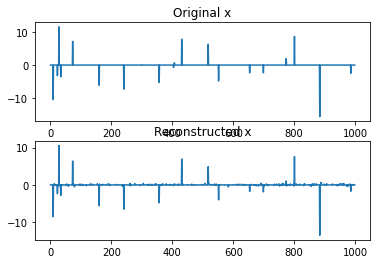

k: 30  obj =  [[11243.1004741]] Change =  299.70674555802907


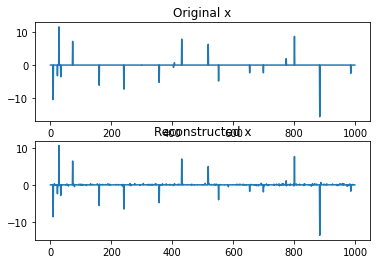

k: 31  obj =  [[10961.11431604]] Change =  281.9861580534689


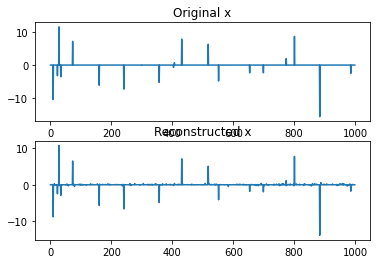

k: 32  obj =  [[10697.55344896]] Change =  263.56086707770373


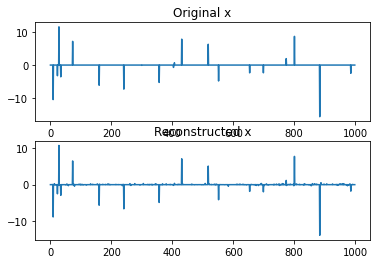

k: 33  obj =  [[10452.95831689]] Change =  244.5951320727072


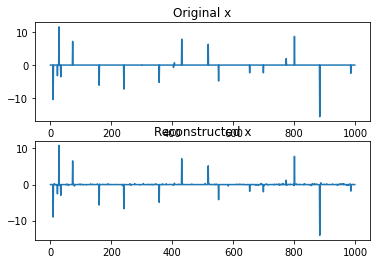

k: 34  obj =  [[10228.33010535]] Change =  224.6282115418162


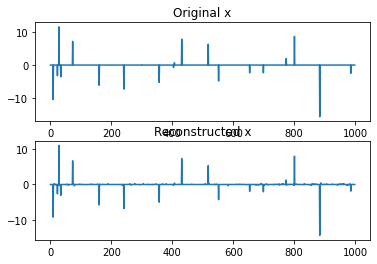

k: 35  obj =  [[10024.73281368]] Change =  203.59729167284058


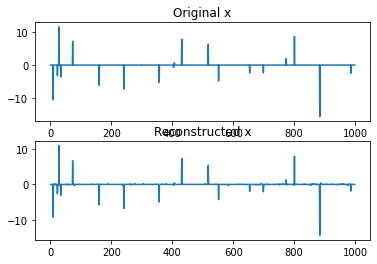

k: 36  obj =  [[9843.05190794]] Change =  181.68090573850168


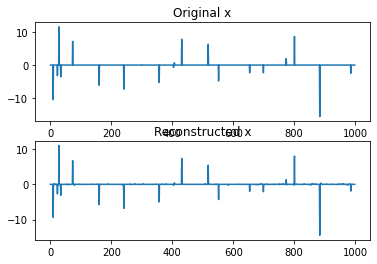

k: 37  obj =  [[9681.71562118]] Change =  161.33628676033004


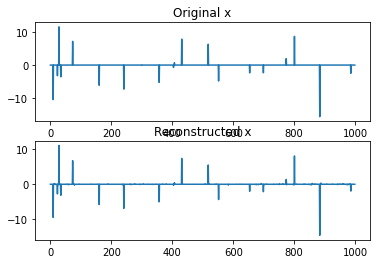

k: 38  obj =  [[9541.80914469]] Change =  139.90647648901722


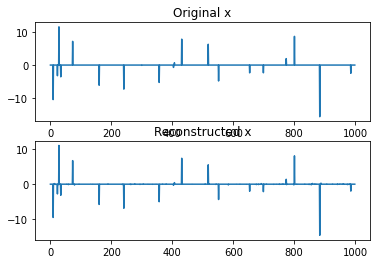

k: 39  obj =  [[9421.11847971]] Change =  120.69066497855601


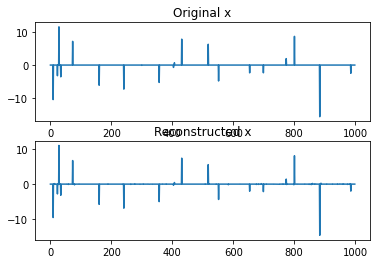

k: 40  obj =  [[9321.78179766]] Change =  99.33668205235335


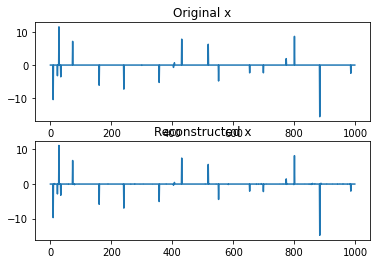

k: 41  obj =  [[9240.92537945]] Change =  80.85641821151148


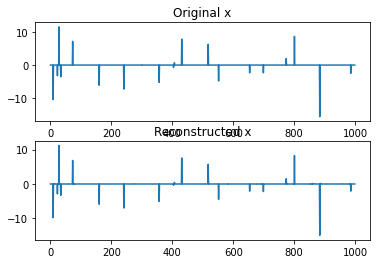

k: 42  obj =  [[9177.73458351]] Change =  63.19079593928109


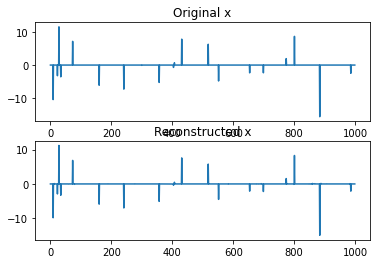

k: 43  obj =  [[9130.47817506]] Change =  47.256408442954125


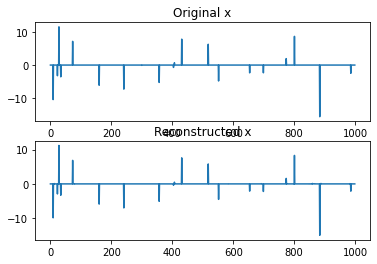

k: 44  obj =  [[9097.43910202]] Change =  33.03907304499808


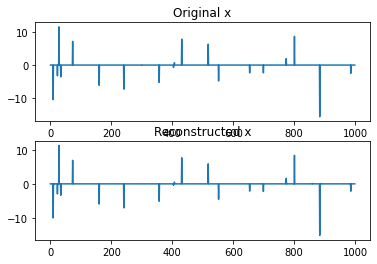

k: 45  obj =  [[9076.09921725]] Change =  21.33988477263665


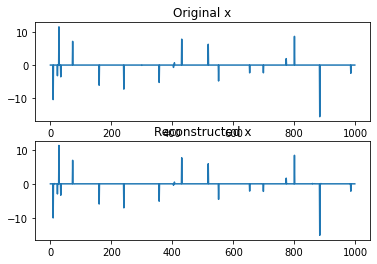

k: 46  obj =  [[9062.33661417]] Change =  13.762603073499122


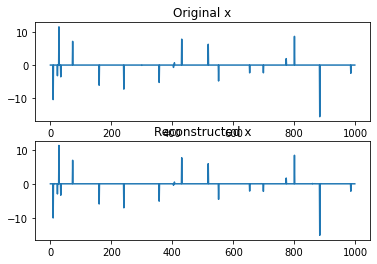

k: 47  obj =  [[9053.47441719]] Change =  8.862196983065587


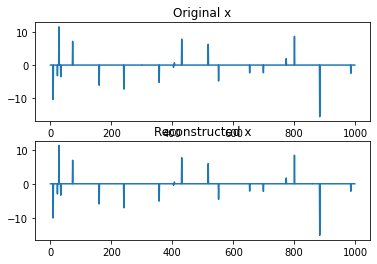

k: 48  obj =  [[9047.90099033]] Change =  5.573426862774795


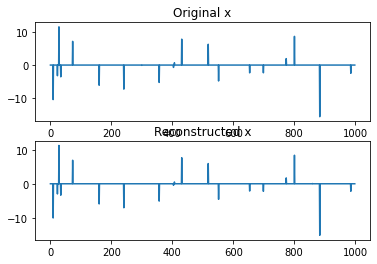

k: 49  obj =  [[9044.35190663]] Change =  3.5490837023953645


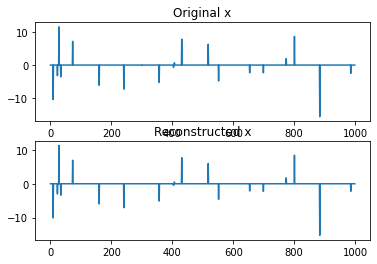

k: 50  obj =  [[9042.38807292]] Change =  1.9638337099058845


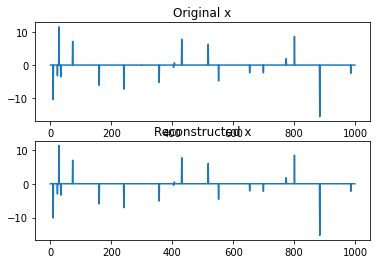

k: 51  obj =  [[9041.40985043]] Change =  0.9782224839891569


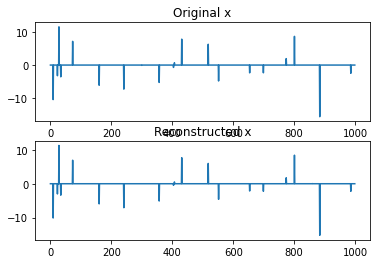

k: 52  obj =  [[9040.86599913]] Change =  0.5438512987948343


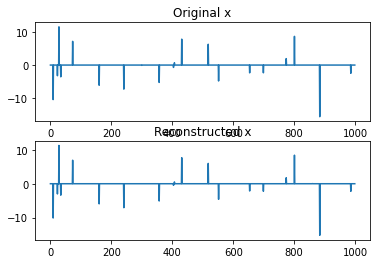

k: 53  obj =  [[9040.55093216]] Change =  0.315066976883827


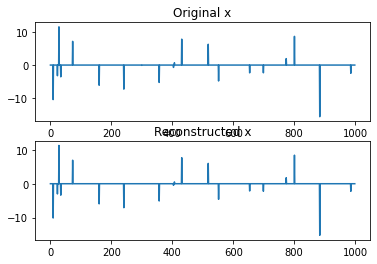

k: 54  obj =  [[9040.36714746]] Change =  0.18378469494564342


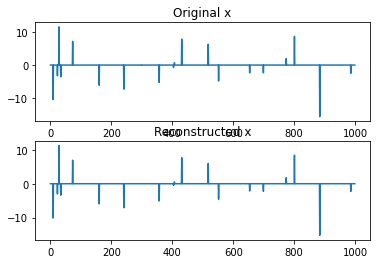

k: 55  obj =  [[9040.26266672]] Change =  0.10448073768202448


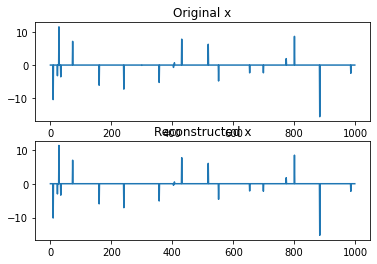

k: 56  obj =  [[9040.20141706]] Change =  0.06124966468451021


In [10]:
for k in range(kMax):
    Gammak = 0.01
    #Gammak = 1/np.linalg.norm(A.T.dot(A))      

    # Line search
    while True:
        #print 'trying stepsize = ', "{0:0.2e}".format(Gammak),
        x_kplus1 = xk - Gammak*grf(A,xk,b)        # Gradient Descent (GD) Step
        if f(A,x_kplus1,b) <= m(x_kplus1,xk,A,b,Gammak):
            #print ' success'
            break
        else:
            #print ' Fail ',
            Gammak = beta*Gammak
    x_kplus1 = proxNorm1(x_kplus1,Gammak*lamda)   # Proximal Operation (Shrinkage)

    # Terminating Condition        
    Dobj = np.linalg.norm(obj(A,x_kplus1,b,lamda) - obj(A,xk,b,lamda))
    print ('k:',k, ' obj = ', obj(A,x_kplus1,b,lamda), 'Change = ',Dobj)
    if(Dobj<0.1):
        break

    # Update xk
    xk = x_kplus1 

    # Graphical Display        
    pp.figure(2)
    pp.clf()        
    pp.subplot(211)    
    pp.plot(xStar)
    pp.title('Original x')
    pp.subplot(212)
    pp.plot(xk)
    pp.title('Reconstructed x')
    pp.draw()
    pp.pause(0.1)
    
pp.show()

